In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from math import sqrt
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import Pipeline


%matplotlib inline

In [2]:
df = pd.read_csv("Concrete_Data.csv")
#extract the features
df_features = df.drop('Concrete compressive strength(MPa, megapascals) ', 1)

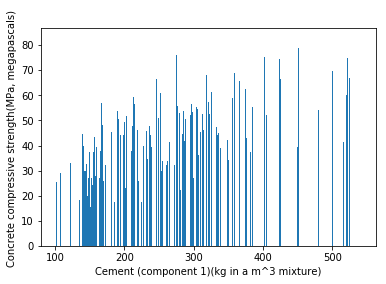

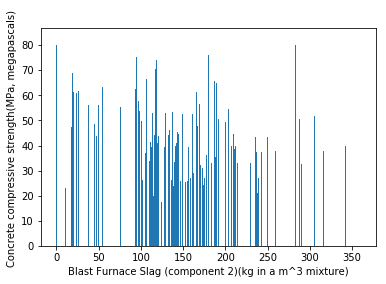

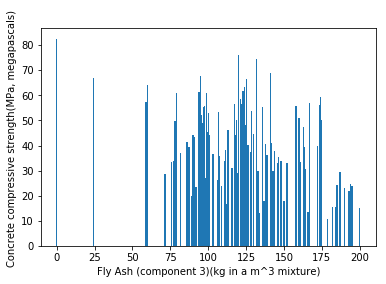

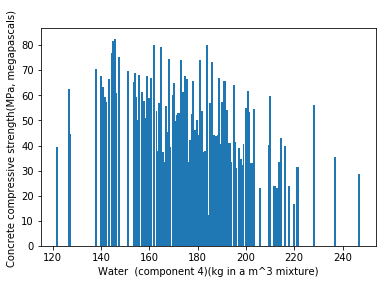

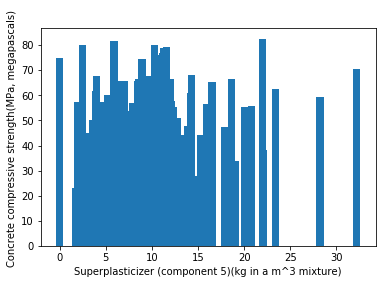

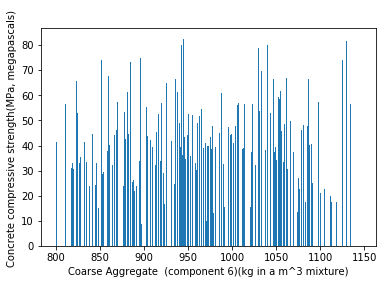

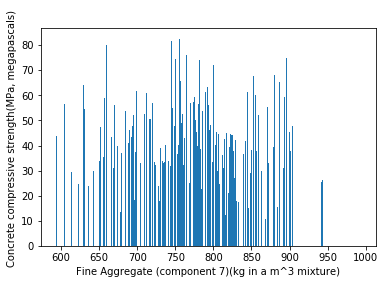

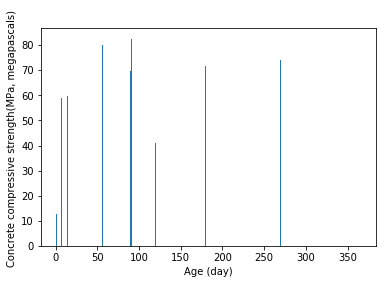

In [4]:
# plot every feature with the output
for column in df_features: 
    fig, ax = plt.subplots()
    plt.bar(df_features[column], df['Concrete compressive strength(MPa, megapascals) '])
    ax.set_xlabel(column)
    ax.set_ylabel('Concrete compressive strength(MPa, megapascals) ')
    plt.show()

In [5]:
# draw correlation matrix to find the most relevant feature
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

('Weight :', -1.6671187614337197e-16)
('Bias: ', 35.817961165048594)
('accuracy: ', 0.2582854921031523)


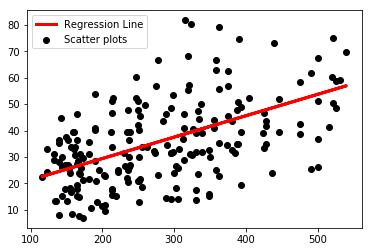

In [5]:
# UNIVARIATE LR USING THE MOST RELEVANT FEATURE (cement) --> from sklearn library
array = np.array(df)
X = array[:,0].reshape(-1, 1)
Y = array[:,8]

# weight and bias
weight = ((np.mean(X)*np.mean(Y))-np.mean(X*Y))/((np.mean(X)*np.mean(X))-np.mean(X*X))
print("Weight :", weight)
bias = np.mean(Y)-np.mean(X)*weight
print("Bias: ", bias)

# Linear regression
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.20)
reg = LinearRegression().fit(train_X, train_y)
pred_y = reg.predict(test_X)

# accuracy
acc = reg.score(test_X, test_y)
print("accuracy: ", acc)

# Plot the graph
plt.scatter(test_X, test_y,  color='black', label = 'Scatter plots')
plt.plot(test_X, pred_y, color='red', linewidth=3, label='Regression Line')
plt.legend()
plt.show()

('Weight :', -1.6671187614337197e-16)
('Bias: ', 35.817961165048594)


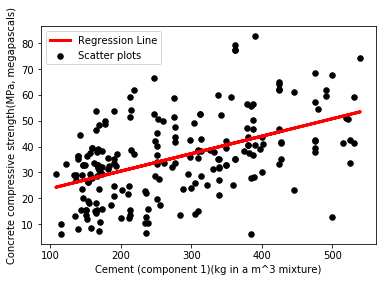

NameError: global name 'm' is not defined

In [6]:
# by my own gd
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 

    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "black", 
               marker = "o", s = 30, label = 'Scatter plots') 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x
    
    # plotting the regression line 
    plt.plot(x, y_pred, color = "red", linewidth=3, label='Regression Line') 
    plt.xlabel('Cement (component 1)(kg in a m^3 mixture)') 
    plt.ylabel('Concrete compressive strength(MPa, megapascals)') 
    plt.legend()
    plt.show() 
def main(): 
    # weight and bias
    weight = ((np.mean(X)*np.mean(Y))-np.mean(X*Y))/((np.mean(X)*np.mean(X))-np.mean(X*X))
    print("Weight :", weight)
    bias = np.mean(Y)-np.mean(X)*weight
    print("Bias: ", bias)
    
    train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.20)
    test_X = test_X.flatten()
    test_y = test_y.flatten()
    train_X = train_X.flatten()
    train_y = train_y.flatten()
    # estimating coefficients 
    b = estimate_coef(test_X, test_y) 
    # plotting regression line 
    plot_regression_line(test_X, test_y, b) 
    
    # claculating accuracy
    ss_t = 0
    ss_r = 0
    m = len()
    for i in range(m):
        y_pred = b[0] + b[1] * X[i]
        ss_t += (Y[i] - np.mean(Y)) ** 2
        ss_r += (Y[i] - y_pred) ** 2
    r2 = 1 - (ss_r/ss_t)
    print("Accuracy: ", r2)
  
if __name__ == "__main__": 
    main() 
    



In [8]:
# multivariate linear regression
# inputs
cement = df['Cement (component 1)(kg in a m^3 mixture)'].values
blast = df['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'].values
ash = df['Fly Ash (component 3)(kg in a m^3 mixture)'].values
water = df['Water  (component 4)(kg in a m^3 mixture)'].values
plasticizer = df['Superplasticizer (component 5)(kg in a m^3 mixture)'].values
coarse = df['Coarse Aggregate  (component 6)(kg in a m^3 mixture)'].values
fine = df['Fine Aggregate (component 7)(kg in a m^3 mixture)'].values
age = df['Age (day)'].values

# output
res = df['Concrete compressive strength(MPa, megapascals) '].values


m = len(cement)
x0 = np.ones(m)
X = np.array([x0, cement, blast, ash, water, plasticizer, coarse, fine, age]).T

# Initial Coefficients
B = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])
Y = np.array(res)

train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.20)

alpha = 0.000001

def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

inital_cost = cost_function(train_X, train_y, B)
print(inital_cost)


def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations-1):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - (alpha * gradient)
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

# 100000 Iterations
newB, cost_history = gradient_descent(train_X, train_y, B, alpha, 100)

# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = test_X.dot(newB)

print("The MSE of Multivariate LR: ", rmse(test_y, Y_pred))
print("The R^2 of Multivariate LR: ", r2_score(test_y, Y_pred))

780.0929212985437
('The MSE of Multivariate LR: ', 13.181784807271526)
('The R^2 of Multivariate LR: ', 0.3290852967335469)


In [18]:
array = np.array(df)
X = np.array(df_features)
Y = array[:,8]
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.20)

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])

model = model.fit(train_X, train_y)
y_pred = model.predict(test_X)
yp = np.array(y_pred)
y  = np.array(test_y)
r = r2_score(y, yp)
mse = mean_squared_error(y, yp)
print("mse for polynomial reg: ", mse)
print("r^2 for polynomial reg: ", r)


('mse for polynomial reg: ', 41.66177668646611)
('r^2 for polynomial reg: ', 0.8754027907813978)
